# Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

# Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


# Customer Bank Relationship

<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


# Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)

# Problem Statement

Model the given data and predict whether the average balance of the customer will fall below the minimum balance in the consecutive month or not

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore') 

In [4]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [9]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [10]:
#checking the dataset distribution
data['churn'].value_counts()/len(data)

churn
0    0.806317
1    0.193683
Name: count, dtype: float64

In [11]:
#separating the dependent and independent variables
X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

In [12]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [13]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building, predictions and odds ratio

In [14]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [15]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)                    # predicting class
predicted_probabilities = classifier.predict_proba(x_test)       # Predicting Probabilities 

In [16]:
predicted_values

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.49824611, 0.50175389],
        [0.65591768, 0.34408232],
        [0.44061466, 0.55938534],
        ...,
        [0.54458416, 0.45541584],
        [0.5114142 , 0.4885858 ],
        [0.57448951, 0.42551049]]),
 (4414, 2))

# Evaluation Metrics

In [18]:
# Accuracy
classifier.score(x_test, y_test)

0.7217942908926144

In [19]:
# precision score
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.3747481531229013

Implies that 37% of the observations have been predicted as false positives

In [20]:
# recall score
from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall 

0.6526315789473685

Implies 65% of the observations have been predicted as +ve

We don't know which metric we should use in this problem, therefore F1 score should be considered

In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predicted_values)
f1

0.4761092150170648

Our model is far from a good model, as F1 score is < 0.5.

Feature Engineering

In [22]:
# calculating precision, recall , f1-score and support at once
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values)

In [23]:
precision

array([0.89846154, 0.37474815])

In [24]:
recall

array([0.73840967, 0.65263158])

In [25]:
f1

array([0.81061073, 0.47610922])

In [26]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3559
           1       0.37      0.65      0.48       855

    accuracy                           0.72      4414
   macro avg       0.64      0.70      0.64      4414
weighted avg       0.80      0.72      0.75      4414



# Precision - Recall Curve

In [27]:
# gathering precision-recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4415,), (4415,), (4414,))

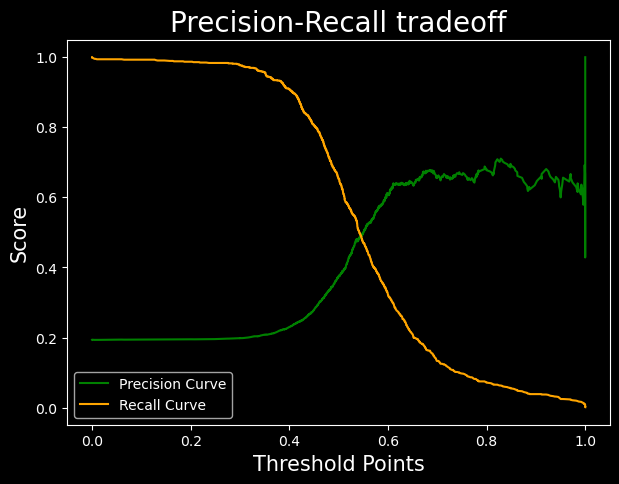

In [28]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

# AUC-ROC Curve

In [29]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])    # only probabilities of class 1 have been passed

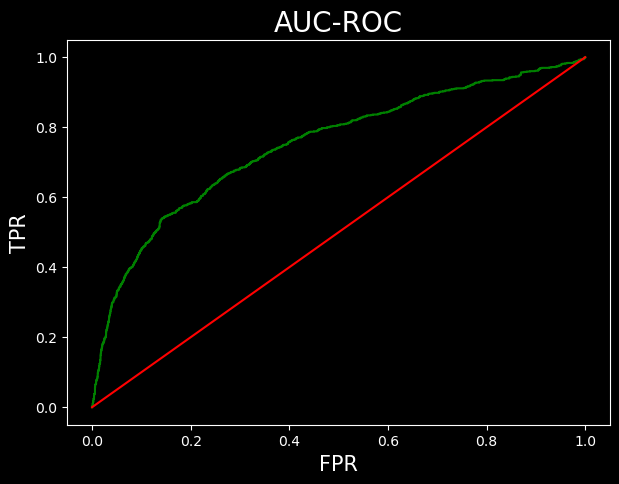

0.749812106364065

In [30]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])

# Coefficient Plot

In [31]:
# arranging the data
c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame( {
                            'coefficients': c,
                            'variable' : x
                            })

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
9,-2.007331,current_balance
14,-0.363281,previous_month_credit
0,-0.158526,vintage
8,-0.135317,days_since_last_transaction
4,-0.105149,occupation


Text(0.5, 1.0, 'Coefficient plot')

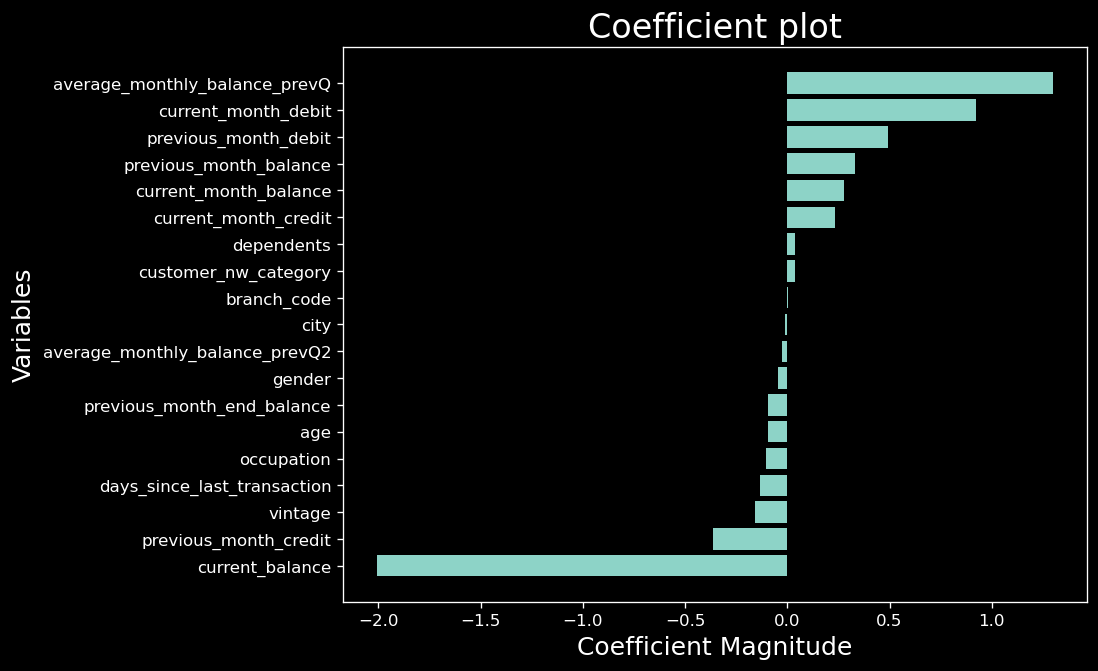

In [32]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(class_weight = 'balanced')
classifier = DTC()

In [35]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)
predicted_values

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# Evaluation Metrics

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [37]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      3559
           1       0.43      0.49      0.45       855

    accuracy                           0.77      4414
   macro avg       0.65      0.67      0.66      4414
weighted avg       0.79      0.77      0.78      4414



It's a Overfitting Model since it performs too well on the training data but the performance drops significantly over the test.

# Hyperparameter Tuning

In [38]:
classifier = DTC()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

# max_depth

In [39]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
    model.fit(x1,y1)
    predict = model.predict(x1)
    f1= f1_score(y1, predict)
    
    predict = model.predict(x2)
    f2= f1_score(y2, predict)
    
    return f1, f2

In [40]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (5,5), dpi=120)
    plt.plot(x_axis, train_score, color='red', label='train_score')
    plt.plot(x_axis, test_score, color='blue', label='test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel('paramaeter value')
    plt.ylabel('f1 score')
    plt.show()

In [41]:
maxdepth=[i for i in range(1,50)]
train=[]
test=[]

for i in maxdepth:
    model= DTC(class_weight='balanced', max_depth=i, random_state = 42)
    f1, f2= calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

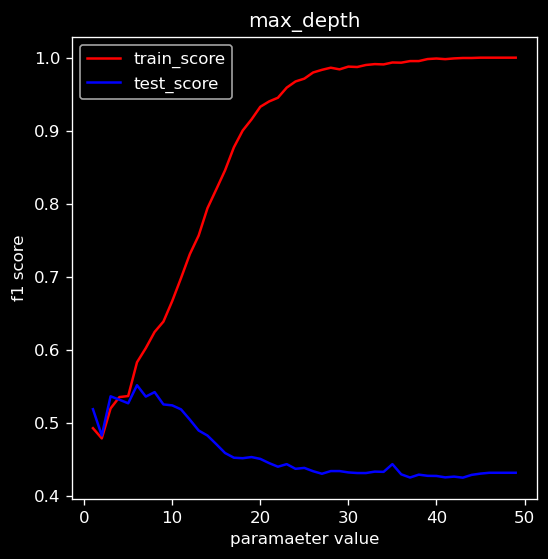

In [42]:
effect(train, test, range(1,50), 'max_depth')

# min_samples_split

In [43]:
min_samples=[i for i in range(2,5000,25)]
train=[]
test=[]

for i in min_samples:
    model= DTC(class_weight='balanced', min_samples_split=i, random_state = 42)
    f1, f2= calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

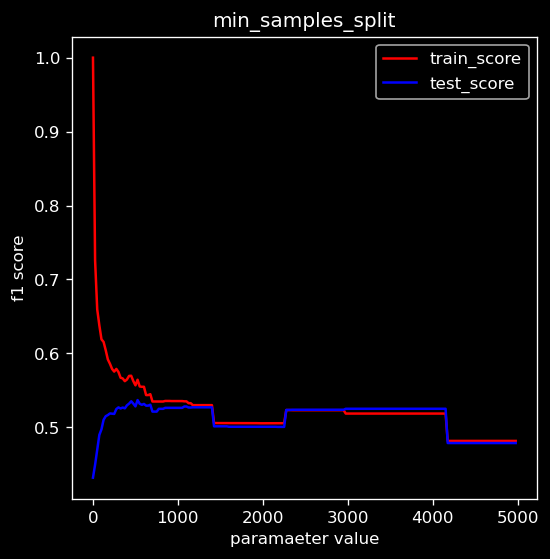

In [44]:
effect(train, test, range(2,5000,25), 'min_samples_split')

# max_leaf_nodes

In [45]:
maxleafnodes = [i for i in range(2, 200, 10)]
train = []
test = []

for i in maxleafnodes:
    model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state= 42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

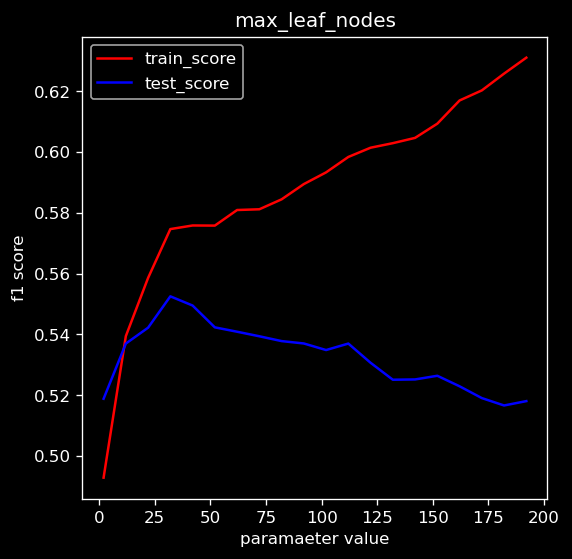

In [46]:
effect(train, test, range(2, 200, 10), 'max_leaf_nodes')

# min_sample_leaf

In [47]:
minsamplesleaf = [i for i in range(2,4000,25)]
train=[]
test=[]

for i in minsamplesleaf:
    model = DTC(class_weight='balanced', min_samples_leaf =i, random_state=42)
    f1,f2= calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

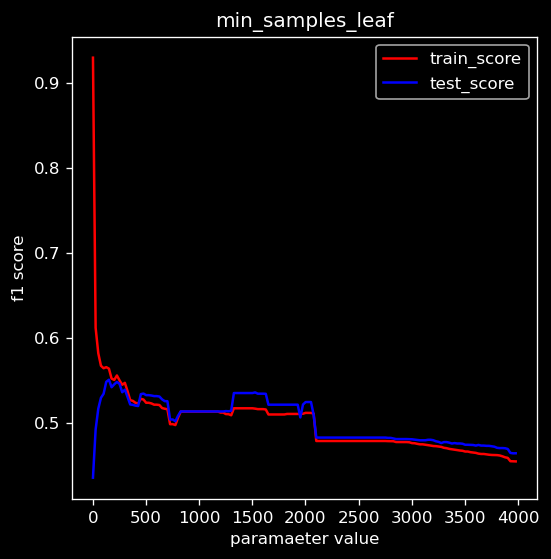

In [48]:
effect(train, test, range(2,4000,25), 'min_samples_leaf')

# Feature Importance

In [49]:
model = DTC(max_depth=9)
model.fit(x_train, y_train)
feature_imp= pd.Series(model.feature_importances_, index=X.columns)
k= feature_imp.sort_values()

Text(0.5, 1.0, 'feature importance')

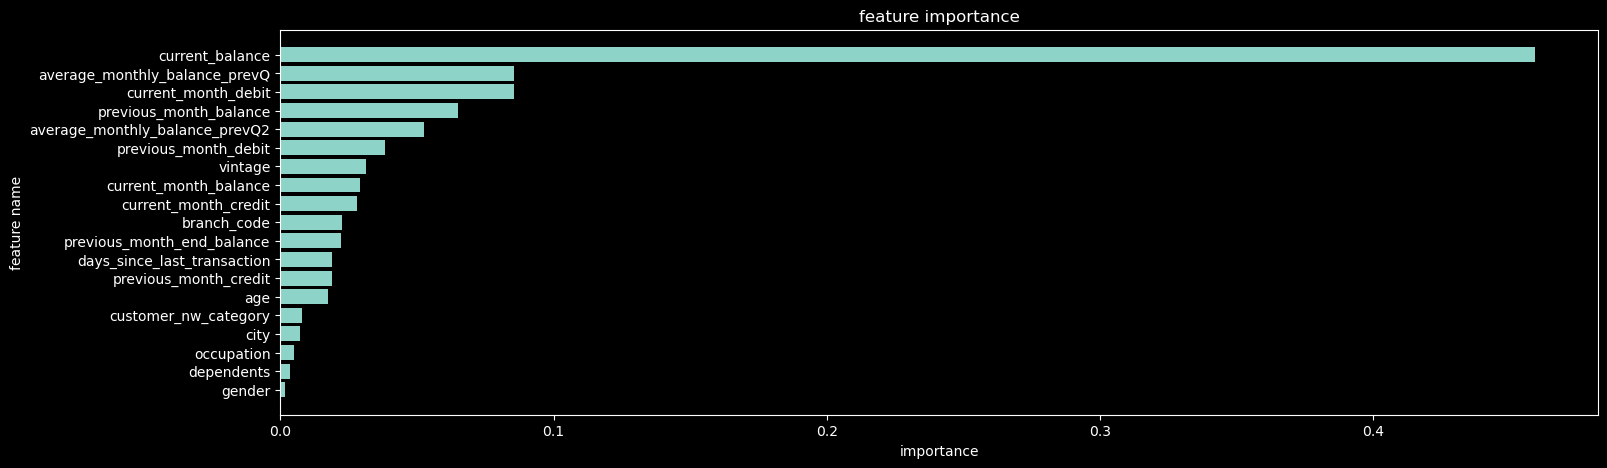

In [50]:
plt.figure(figsize=(17,5), dpi=100)
plt.barh(k.index, k)
plt.xlabel('importance')
plt.ylabel('feature name')
plt.title('feature importance')